In [1]:
# !pip install requests beautifulsoup4 pandas nltk

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from urllib.parse import quote_plus, urlparse
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def scrape_jobs(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    job_data = []
    job_elements = soup.find_all(['div', 'li'], class_=re.compile('card|job|posting|listing', re.I))

    common_skills = [
        'Python', 'Java', 'JavaScript', 'C++', 'C#', 'SQL', 'Ruby', 'PHP', 'Swift', 'Go', 'Rust',
        'Kotlin', 'TypeScript', 'React', 'Angular', 'Vue.js', 'Node.js', 'Django', 'Flask', 'Spring',
        'ASP.NET', 'Machine Learning', 'AI', 'Data Science', 'Cloud', 'AWS', 'Azure', 'GCP', 'Docker',
        'Kubernetes', 'DevOps', 'CI/CD', 'Git', 'Agile', 'Scrum', 'REST API', 'GraphQL', 'Microservices',
        'Big Data', 'Hadoop', 'Spark', 'TensorFlow', 'PyTorch', 'Computer Vision', 'NLP', 'Scala',
        'Shell Scripting', 'Perl', 'Objective-C', 'MATLAB', 'Haskell', 'Elixir', 'F#', 'R', 'Julia',
        'Firebase', 'MongoDB', 'PostgreSQL', 'MySQL', 'SQLite', 'Redis', 'Cassandra', 'Oracle',
        'Couchbase', 'MariaDB', 'Terraform', 'Ansible', 'Puppet', 'Chef', 'Nagios', 'Jenkins',
        'Travis CI', 'CircleCI', 'Bamboo', 'Bitbucket', 'GitLab', 'Jira', 'Confluence', 'Trello',
        'WebAssembly', 'OpenShift', 'Linux', 'Windows Server', 'Bash', 'Zsh', 'Powershell',
        'Cybersecurity', 'Penetration Testing', 'Ethical Hacking', 'Cryptography', 'Firewall',
        'Networking', 'Load Balancing', 'HTTP/HTTPS', 'TCP/IP', 'UDP', 'DNS', 'DHCP', 'VPN',
        'SSL/TLS', 'OAuth', 'SAML', 'LDAP', 'Active Directory', 'Zero Trust', 'SIEM', 'SOC',
        'IDS/IPS', 'Threat Hunting', 'Incident Response', 'Data Encryption', 'GDPR', 'HIPAA',
        'SOC2', 'PCI-DSS', 'Kafka', 'RabbitMQ', 'ActiveMQ', 'Apache Nifi', 'Data Warehousing',
        'ETL', 'Data Pipelines', 'dbt', 'Airflow', 'Azure Data Factory', 'Prefect', 'Luigi',
        'BI Tools', 'Power BI', 'Tableau', 'Looker', 'Qlik', 'Snowflake', 'Data Governance',
        'Data Quality', 'Data Lakes', 'Data Vault', 'OLAP', 'OLTP', 'NoSQL', 'Graph Databases',
        'Neo4j', 'ElasticSearch', 'Lucene', 'Solr', 'Prometheus', 'Grafana', 'ELK Stack',
        'Graylog', 'Splunk', 'Logstash', 'Jaeger', 'OpenTelemetry', 'Service Mesh',
        'Istio', 'Linkerd', 'Envoy', 'Kong', 'Service Fabric', 'Pivotal Cloud Foundry',
        'OpenStack', 'Selenium', 'Appium', 'Cypress', 'Puppeteer', 'JUnit', 'TestNG',
        'xUnit', 'MSTest', 'Pytest', 'Unittest', 'Mockito', 'Cucumber', 'SpecFlow',
        'Load Testing', 'Performance Testing', 'Security Testing', 'API Testing',
        'Contract Testing', 'Chaos Engineering', 'Fault Tolerance', 'Distributed Systems',
        'Concurrency', 'Multithreading', 'Parallel Computing', 'Event-Driven Architecture',
        'CQRS', 'DDD', 'TDD', 'BDD', 'SOLID Principles', 'YAML', 'JSON', 'XML',
        'HTTP2', 'WebSockets', 'gRPC', 'SOAP', 'WSDL', 'OAuth2', 'OpenID Connect',
        'SAML2', 'JWT', 'JSON Web Tokens', 'XML Schema', 'XSD', 'XSLT', 'WCF',
        'RPA (Robotic Process Automation)', 'UiPath', 'Blue Prism', 'Automation Anywhere'
    ]

    for index, job in enumerate(job_elements):

        title = job.find(['h2', 'h3', 'h4', 'span'], class_=re.compile('title', re.I))
        company = job.find(['span', 'div', 'a'], class_=re.compile('company', re.I))
        location = job.find(['span', 'div'], class_=re.compile('location', re.I))


        skills = []
        job_text = job.get_text()

        for skill in common_skills:
            if re.search(r'\b' + re.escape(skill) + r'\b', job_text, re.I):
                skills.append(skill)



        if title and company and location:
            location_text = location.text.strip()
            # Basic filter for US locations
            # print("company",company.text.strip())
            if any(state in location_text for state in ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']) or 'United States' in location_text or 'USA' in location_text:
                job_data.append({
                    'title': title.text.strip(),
                    'company': company.text.strip(),
                    'location': location_text,
                    'skills': skills
                })



    return job_data


In [4]:
def analyze_jobs(job_data):
    all_skills = [skill for job in job_data for skill in job['skills']]
    top_skills = Counter(all_skills).most_common(10)

    companies = Counter([job['company'] for job in job_data if job['company'].strip()])
    top_hiring_companies = companies.most_common(5)

    return top_skills, top_hiring_companies

In [5]:
query = "Computer Science job postings United States"
urls = ["https://www.dice.com/jobs/q-computer+science-jobs"]

all_job_data = []
print("\nTop 10 Unique Websites:")
for url in urls:
    print(f"Scraping: {url}")
    job_data = scrape_jobs(url)
    all_job_data.extend(job_data)

print(f"\nTotal US jobs scraped: {len(all_job_data)}")

top_skills, top_hiring_companies = analyze_jobs(all_job_data)

print("\nTop 10 Required Skills for US Jobs:")
for skill, count in top_skills:
    print(f"{skill}: {count}")

print("\nTop 5 Companies Hiring in the US:")
for company, count in top_hiring_companies:
    print(f"{company}: {count}")


Top 10 Unique Websites:
Scraping: https://www.dice.com/jobs/q-computer+science-jobs

Total US jobs scraped: 72

Top 10 Required Skills for US Jobs:
Data Science: 12
AI: 8
Computer Vision: 8
Spring: 4
Python: 4
Cloud: 4
Azure: 4
Spark: 4
Data Pipelines: 4

Top 5 Companies Hiring in the US:
Penn StateCompany Name - Penn State•Remote or Pennsylvania, USA: 3
Digital Literacy and Computer Science ScorerJob Title - Digital Literacy and Computer Science ScorerSavePearsonCompany Name - Pearson•Hadley, Massachusetts, USAPart-timeWe are the world's learning company with more than 24,000 employees operating in 70 countries. We combine world-class educational content and assessment, powered by services and technology, to enable more effective teaching and personalized learning at scale. We believe that wherever learning flourishes so do people. The Evaluation Systems group of Pearson offers dynamic teacher licensing and performance assessment solutions. Our custom teacher licensure testing progra

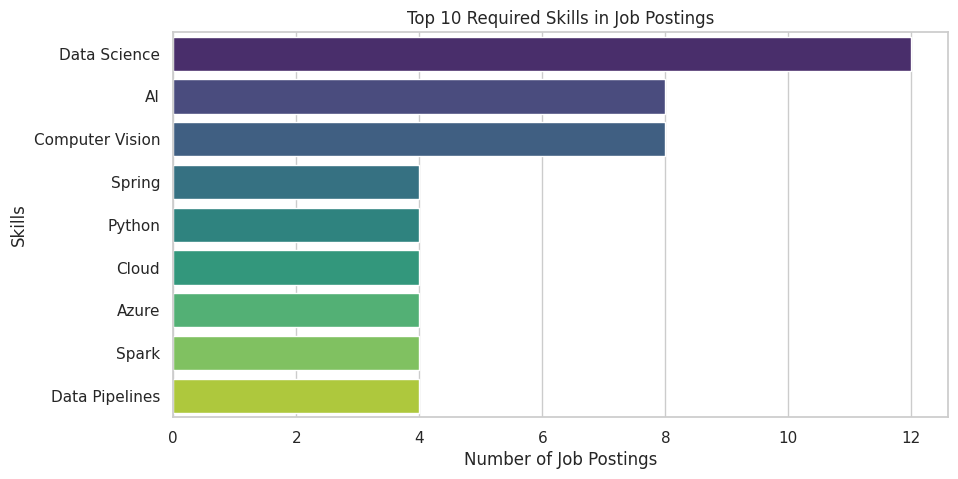

In [6]:
sns.set(style="whitegrid")

# Visualization for top 10 required skills
skills, skill_counts = zip(*top_skills)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(skill_counts), y=list(skills), hue=list(skills), palette="viridis", dodge=False, legend=False)
plt.title('Top 10 Required Skills in Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.show()

